# Homework III

## II. Programming and critical analysis [8v]

Consider the _winequality-red.csv_ dataset (available at the webpage) where the goal is to estimate the quality (sensory appreciation) of a wine based on physicochemical inputs.

Using a 80-20 training-test split with a fixed seed (_random_state=0_), you are asked to learn MLP regressors to answer the following questions.

Given their stochastic behavior, average the performance of each MLP from 10 runs (for reproducibility consider seeding the MLPs with _random_state_ $\in$ {1..10})

1) [3.5v] Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation on all nodes, and early stopping with 20% of training data set aside for validation. All remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as default. Plot the distribution of the residues (in absolute value) using a histogram.

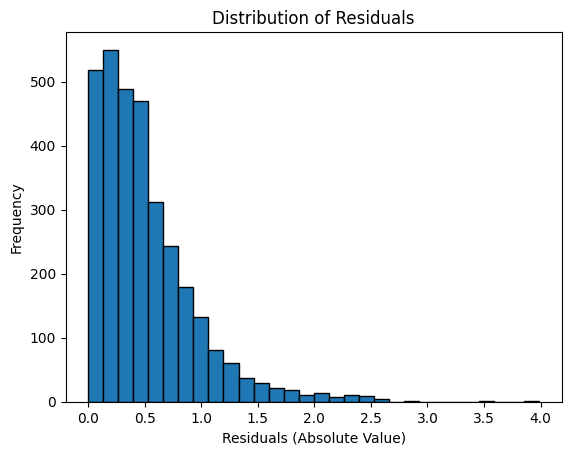

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# Define features and target variable
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Initialize variables to store residuals from 10 runs
residuals = []

# Set the random seeds for reproducibility
random_seeds = range(1, 11)

# Perform 10 runs
for random_seed in random_seeds:
    # Split the dataset into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create and train the MLP regressor
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=random_seed,
                                early_stopping=True, validation_fraction=0.2)
    mlp_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp_regressor.predict(X_test)

    # Calculate residuals
    residual = np.abs(y_test - y_pred)
    residuals.extend(residual)

# Plot the distribution of residuals using a histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals (Absolute Value)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

2) [1.5v] Since we are in the presence of a _integer regression_ task, a recommended trick is to round and bound estimates. Assess the impact of these operations on the MAE of the MLP learnt in previous question.

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# Define features and target variable
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Initialize variables to store residuals from 10 runs
residuals = []

# Set the random seeds for reproducibility
random_seeds = range(1, 11)

# Initialize variables to store MAE before and after rounding and bounding
mae_before = []
mae_after = []

# Define rounding and bounding function
def round_and_bound(predictions):
    rounded_predictions = np.round(predictions)
    bounded_predictions = np.clip(rounded_predictions, a_min=3, a_max=8)  # Adjust bounds as needed
    return bounded_predictions

# Perform 10 runs
for random_seed in random_seeds:
    # Split the dataset into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create and train the MLP regressor
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=random_seed,
                                early_stopping=True, validation_fraction=0.2)
    mlp_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp_regressor.predict(X_test)

    # Calculate residuals before rounding and bounding
    residual_before = np.abs(y_test - y_pred)
    mae_before.append(mean_absolute_error(y_test, y_pred))

    # Round and bound estimates
    y_pred_rounded_and_bounded = round_and_bound(y_pred)

    # Calculate residuals after rounding and bounding
    residual_after = np.abs(y_test - y_pred_rounded_and_bounded)
    mae_after.append(mean_absolute_error(y_test, y_pred_rounded_and_bounded))

    # Store residuals
    residuals.extend(residual_after)


# Calculate and print the average MAE before and after rounding and bounding
avg_mae_before = np.mean(mae_before)
avg_mae_after = np.mean(mae_after)
print(f"Average MAE before rounding and bounding: {avg_mae_before}")
print(f"Average MAE after rounding and bounding: {avg_mae_after}")

Average MAE before rounding and bounding: 0.5097171955009514
Average MAE after rounding and bounding: 0.43875000000000003


3) [1.5v] Similarly assess the impact on RMSE from replacing early stopping by a well-defined number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Load the dataset
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# Define features and target variable
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Initialize variables to store RMSE for different numbers of iterations and for early stopping
rmse_values = []

# Set the random seeds for reproducibility
random_seeds = range(1, 11)

# Define different numbers of iterations and early stopping as 1 to include it
iterations = [1, 20, 50, 100, 200]

# Perform 10 runs for each number of iterations
for num_iterations in iterations:
    rmse_per_iteration = []  # To store RMSE for each run with the given number of iterations
    
    for random_seed in random_seeds:
        # Split the dataset into training and test sets (80-20 split)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        if num_iterations == 1:
            # Create and train the MLP regressor with early stopping
            mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=random_seed,
                                        early_stopping=True, validation_fraction=0.2)
        else:
            # Create and train the MLP regressor with the specified number of iterations
            mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=random_seed,
                                        max_iter=num_iterations, solver='adam')

        mlp_regressor.fit(X_train, y_train)

        # Predict on the test set
        y_pred = mlp_regressor.predict(X_test)

        # Calculate RMSE
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmse_per_iteration.append(rmse)

    # Calculate the average RMSE for the given number of iterations or early stopping
    avg_rmse = np.mean(rmse_per_iteration)
    rmse_values.append(avg_rmse)


# Print RMSE values for each number of iterations or early stopping
for num_iterations, rmse in zip(iterations, rmse_values):
    if num_iterations == 1:
        print(f"Early Stopping, Average RMSE: {rmse}")
    else:
        print(f"Number of Iterations: {num_iterations}, Average RMSE: {rmse}")

Early Stopping, Average RMSE: 0.6706527958221328
Number of Iterations: 20, Average RMSE: 1.4039789509925442
Number of Iterations: 50, Average RMSE: 0.7996073631460568
Number of Iterations: 100, Average RMSE: 0.6940361469112143
Number of Iterations: 200, Average RMSE: 0.6554543932216474


4) [1.5v] Critically comment the results obtained in previous question, hypothesizing at least one reason why early stopping favors and/or worsens performance.

&nbsp;&nbsp;Com o intuito de tentar melhorar os nossos resultados, podemos utilizar o "early stopping". Este método não se baseia num número específico de iterações mas sim no momento em que a performance do modelo começa a baixar. Existem algumas vantagens ao usar early stoppping: reduz a ocorrência de overfitting e pode até economizar algum tempo de treino, se a performance começar a reduzir cedo. No entanto, também existem desvantagens, principalmente o risco de haver um "stop" prematuro, causando um problema de underfitting. Assim, ao usarmos early stopping, estaríamos a prevenir o overfitting, porém teríamos de ter em conta os casos de "stops" prematuros que iriam causar underfitting (embora que raros) e performances subóptimas. 

&nbsp;&nbsp;Ao analisar os valores do exercício anterior, em que o RMSE é analisado através de um número fixos de iterações, percebemos que este vai diminuindo com o aumento de iterações. Um ponto importante a referir é que ao calcular o average RMSE com early stopping (dando um valor de 0.6706527958221328) podemos compara-lo com os RMSE de iterações fixas. Vemos que o RMSE do early stopping é menor que todos os outros execto em 200 iterações. Isto quer dizer que nas iteraçoes de 20, 50 e 100 estamos presentes um problema de underfitting, o modelo não teve tempo para convergir. Outra observação que também podemos fazer é em relação aos testing e validation sets provenientes do early stopping. Para além das desvantagens anteriormente apresentadas, o early stopping é sensível à escolha de testing e validation sets. Se o validition set não for suficientemente representativo do testing set o modelo pode sofrer de underfitting ou overfitting. Assim, e assumindo que o número máximo de iterações no early stopping é 200 podemos comparar a performance deste método com o de 200 iterações fixas. Visto que o de 200 iterações fixas é menor podemos concluir que o validation set usado no early stopping é subóptimo, havendo um mais representativo do testing set.